# 0. Content
    1. Import Libraries & Data
    2. Data Preprocessing & Cleaning
    3. Elbow Technique
    4. Run K-Means algorithm
       i) Male Primary & upper secondary
       ii) Female primary and upper secondary
    5. Discussion

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
path = r'C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Education Completion Analysis'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','State_of_Education.csv'))

# 2. Data Preprocessing and Cleaning

In [4]:
df.head()

,Country,Indicator,Gender,Education_Level,Wealth_Quintile,Residence,Data_Year,Percentage,Data_Source,Happiness_Rank,Country_Code,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,Primary,Total,Total,2015,40.200001,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,Primary,Total,Total,2015,67.199997,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,Upper Secondary,Not Available,Not Available,2015,14.365360,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,Upper Secondary,Not Available,Not Available,2015,32.315559,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
4,Afghanistan,Completion rate for adolescents of lower secon...,Female,Lower Secondary,Not Available,Not Available,2015,25.631340,DHS 2015,146.0,AFG,368.754614,South Asia,Low income


In [5]:
# Removing categorical columns
df = df[['Country', 'Indicator', 'Gender', 'Percentage', 'Happiness_Rank', 'GDP_PerCapita']]

In [6]:
# Creating subset for primary level completion rates 
df_prim_comp = df[df['Indicator']=='Completion rate for children of primary school age']
df_prim_comp

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757
14,Albania,Completion rate for children of primary school...,Female,95.698372,90.0,6492.872012
...,...,...,...,...,...,...
1089,Zambia,Completion rate for children of primary school...,Male,70.944771,137.0,1137.343633
1096,Zimbabwe,Completion rate for children of primary school...,Female,91.599998,144.0,1773.920411
1097,Zimbabwe,Completion rate for children of primary school...,Male,86.400002,144.0,1773.920411
1106,Kosovo,Completion rate for children of primary school...,Female,98.800000,32.0,5269.783901


In [7]:
# Checking nan values
df_prim_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    40
GDP_PerCapita      8
dtype: int64

In [8]:
# Checking nan values
df_prim_comp_NaN = df_prim_comp[df_prim_comp['Happiness_Rank'].isnull()==True]
df_prim_comp_NaN

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757
48,Burundi,Completion rate for children of primary school...,Female,54.099998,NaN,221.477676
49,Burundi,Completion rate for children of primary school...,Male,46.000000,NaN,221.477676
106,Belize,Completion rate for children of primary school...,Female,96.000000,NaN,6228.267309
107,Belize,Completion rate for children of primary school...,Male,94.800003,NaN,6228.267309
142,Barbados,Completion rate for children of primary school...,Female,99.199997,NaN,17225.462300
143,Barbados,Completion rate for children of primary school...,Male,98.699997,NaN,17225.462300
166,Central African Republic,Completion rate for children of primary school...,Female,23.639120,NaN,461.137490
167,Central African Republic,Completion rate for children of primary school...,Male,29.803450,NaN,461.137490


In [9]:
# Removing Nan Values 
df_prim_comp.dropna(inplace=True)

C:\Users\Azalia\AppData\Local\Temp\ipykernel_142460\3501297835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prim_comp.dropna(inplace=True)


In [10]:
# Checking nan values
df_prim_comp.isnull().sum()

Country           0
Indicator         0
Gender            0
Percentage        0
Happiness_Rank    0
GDP_PerCapita     0
dtype: int64

In [11]:
df_prim_comp.shape

(168, 6)

In [12]:
# Creating subset data for Primary level Completion rate for Male & Female
df_prim_comp_M = df_prim_comp.loc[df['Gender']=='Male']
df_prim_comp_F = df_prim_comp.loc[df['Gender']=='Female']

In [13]:
# Drop further categorical values
df_prim_comp_M = df_prim_comp_M[['Percentage', 'Happiness_Rank', 'GDP_PerCapita']]

In [14]:
df_prim_comp_M.head()

,Percentage,Happiness_Rank,GDP_PerCapita
1,67.199997,146.0,368.754614
15,94.155960,90.0,6492.872012
27,95.666924,57.0,10636.120200
37,99.389252,82.0,4966.513471
61,51.015980,115.0,1319.154995


In [15]:
# Creating subset for primary level completion rates 
df_upsec_comp = df[df['Indicator']=='Completion rate for youth of upper secondary education school age']
df_upsec_comp

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614
10,Angola,Completion rate for youth of upper secondary e...,Female,15.210190,NaN,1953.533757
11,Angola,Completion rate for youth of upper secondary e...,Male,23.698139,NaN,1953.533757
16,Albania,Completion rate for youth of upper secondary e...,Female,79.857063,90.0,6492.872012
...,...,...,...,...,...,...
1091,Zambia,Completion rate for youth of upper secondary e...,Male,33.276039,137.0,1137.343633
1098,Zimbabwe,Completion rate for youth of upper secondary e...,Female,13.600000,144.0,1773.920411
1099,Zimbabwe,Completion rate for youth of upper secondary e...,Male,17.200001,144.0,1773.920411
1108,Kosovo,Completion rate for youth of upper secondary e...,Female,86.600000,32.0,5269.783901


In [16]:
# Checking nan values
df_upsec_comp.isnull().sum()

Country            0
Indicator          0
Gender             0
Percentage         0
Happiness_Rank    40
GDP_PerCapita      8
dtype: int64

In [17]:
# Removing Nan Values 
df_upsec_comp.dropna(inplace=True)
df_upsec_comp.isnull().sum()

C:\Users\Azalia\AppData\Local\Temp\ipykernel_142460\1951673087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp.dropna(inplace=True)


Country           0
Indicator         0
Gender            0
Percentage        0
Happiness_Rank    0
GDP_PerCapita     0
dtype: int64

In [18]:
# Creating subset data for upper secondary level Completion rate for Male & Female
df_upsec_comp_M = df_upsec_comp.loc[df['Gender']=='Male']
df_upsec_comp_F = df_upsec_comp.loc[df['Gender']=='Female']

In [19]:
# Drop further categorical values
df_upsec_comp_M = df_upsec_comp_M[['Percentage', 'Happiness_Rank', 'GDP_PerCapita']]
df_upsec_comp_F = df_upsec_comp_F[['Percentage', 'Happiness_Rank', 'GDP_PerCapita']]

# 3. Elbow Technique

In [20]:
num_clstr = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_clstr] # Defines k-means clusters in the range assigned above.

In [21]:
# Calculating a rate of variation score for the given number of cluster
score = [kmeans[i].fit(df_prim_comp_M).score(df_prim_comp_M) for i in range(len(kmeans))] 

score

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

[-1197518682.5873535,
 -391032755.92412484,
 -173928550.26865214,
 -84859338.5649072,
 -49342948.40730097,
 -35856610.16288161,
 -22714157.55546669,
 -16295753.265496675,
 -13571175.86098288]

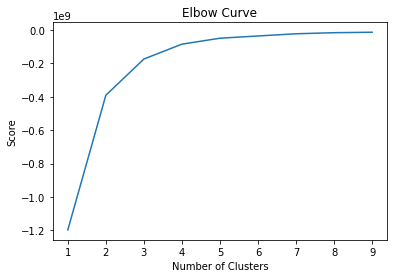

In [22]:
# Plot the elbow curve using PyLab.
pl.plot(num_clstr,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters that will be chosen is 4. Anything bigger than 4, the rate of variation reduces significantly.

In [23]:
num_clstr = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_clstr] # Defines k-means clusters in the range assigned above.

In [24]:
# Calculating a rate of variation score for the given number of cluster
score = [kmeans[i].fit(df_upsec_comp_M).score(df_upsec_comp_M) for i in range(len(kmeans))] 

score

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

[-1197542069.4319384,
 -391047377.31203556,
 -173945834.89357954,
 -84873578.56776461,
 -49356782.04106584,
 -35869851.20797379,
 -22732470.342728667,
 -16504284.670940997,
 -13367385.416155204]

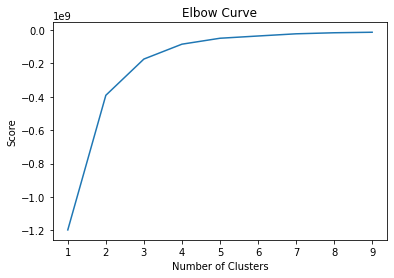

In [25]:
# Plot the elbow curve using PyLab.

pl.plot(num_clstr,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4. Run K-Means Algorithm

### k-means for Male Primary Level Completion

In [26]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [27]:
# Fit the k-means object to the data.
kmeans.fit(df_prim_comp_M)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [28]:
# Creating new column to identify cluster num
df_prim_comp_M['Clusters'] = kmeans.fit_predict(df_prim_comp_M)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
df_prim_comp_M.head()

,Percentage,Happiness_Rank,GDP_PerCapita,Clusters
1,67.199997,146.0,368.754614,1
15,94.155960,90.0,6492.872012,0
27,95.666924,57.0,10636.120200,0
37,99.389252,82.0,4966.513471,3
61,51.015980,115.0,1319.154995,1


In [30]:
df_prim_comp_M['Clusters'].value_counts()

1    38
3    24
0    17
2     5
Name: Clusters, dtype: int64

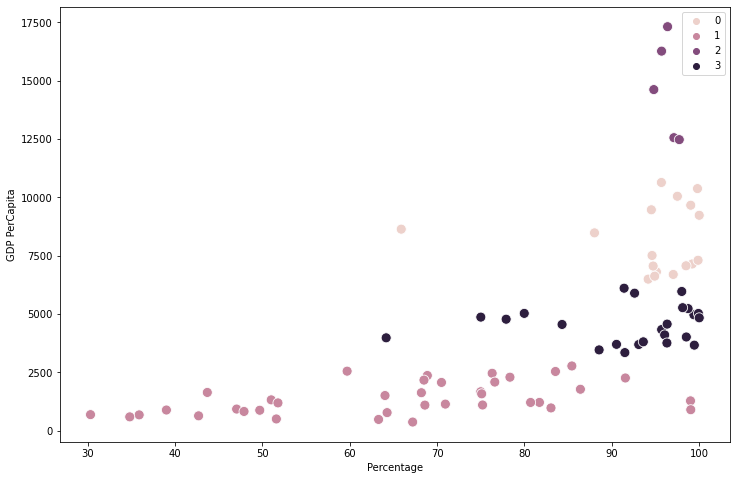

In [31]:
# Plot the clusters for the "Percentage" and "GDP_PerCapita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prim_comp_M['Percentage'], y=df_prim_comp_M['GDP_PerCapita'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('GDP PerCapita') # Label y-axis.
plt.show()

For Male Primary level completion, we can see that the high GDP clusters have  high percentage completion at primary level.

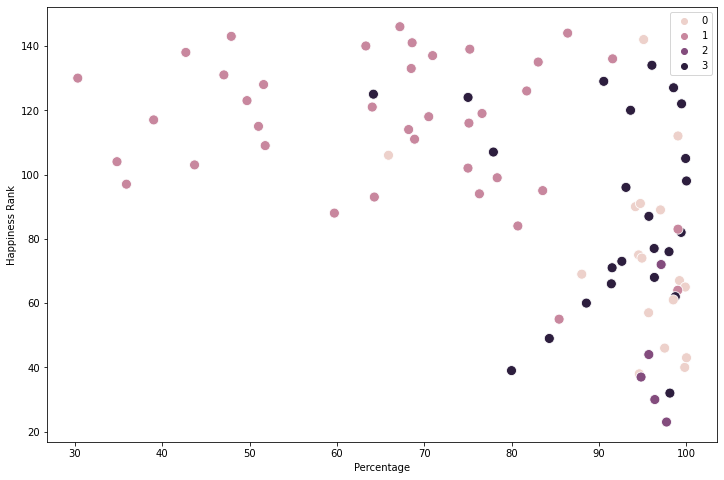

In [32]:
# Plot the clusters for the "Percentage" and "Happiness_Rank" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prim_comp_M['Percentage'], y=df_prim_comp_M['Happiness_Rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('Happiness Rank') # Label y-axis.
plt.show()

In [33]:
# Renaming the clusters
df_prim_comp_M.loc[df_prim_comp_M['Clusters'] == 1, 'Cluster'] = 'Low GDP PerCapita'
df_prim_comp_M.loc[df_prim_comp_M['Clusters'] == 0, 'Cluster'] = 'Mid-High GDP PerCapita'
df_prim_comp_M.loc[df_prim_comp_M['Clusters'] == 2, 'Cluster'] = 'High GDP PerCapita'
df_prim_comp_M.loc[df_prim_comp_M['Clusters'] == 3, 'Cluster'] = 'Mid-Low GDP PerCapita'

In [34]:
df_prim_comp_M.head()

,Percentage,Happiness_Rank,GDP_PerCapita,Clusters,Cluster
1,67.199997,146.0,368.754614,1,Low GDP PerCapita
15,94.155960,90.0,6492.872012,0,Mid-High GDP PerCapita
27,95.666924,57.0,10636.120200,0,Mid-High GDP PerCapita
37,99.389252,82.0,4966.513471,3,Mid-Low GDP PerCapita
61,51.015980,115.0,1319.154995,1,Low GDP PerCapita


In [35]:
# Export data
df_prim_comp_M.to_csv(os.path.join(path,'02 Data','Prepared Data', 'clust_prim_comp_M.csv'))

In [36]:
df_prim_comp_M.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

GDP_PerCapita               Happiness_Rank         \
                                mean        median           mean median   
Cluster                                                                    
High GDP PerCapita      14644.933132  14617.604480      41.200000   37.0   
Low GDP PerCapita        1393.189106   1209.072738     115.026316  117.5   
Mid-High GDP PerCapita   8189.003530   7507.160971      74.411765   69.0   
Mid-Low GDP PerCapita    4538.384346   4558.662407      88.708333   84.5   

                       Percentage             
                             mean     median  
Cluster                                       
High GDP PerCapita      96.335841  96.375938  
Low GDP PerCapita       65.962038  68.547782  
Mid-High GDP PerCapita  94.616194  95.666924  
Mid-Low GDP PerCapita   91.625664  94.648510

High Percentage Completion for males at primary level lands you in mid to high GDP per capita range. A median of 68% completion rate at primary level puts the country in low GDP. As expected, higher GDP correlates to top ranking in happiness

#### Run k-means for Male upper secondary completion

In [37]:
# Create the k-means object.
kmeans_upsec_M = KMeans(n_clusters = 4) 

In [38]:
# Fit the k-means object to the data.
kmeans_upsec_M.fit(df_upsec_comp_M)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [39]:
# Creating new column to identify cluster num
df_upsec_comp_M['clusters'] = kmeans_upsec_M.fit_predict(df_upsec_comp_M)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
df_upsec_comp_M.head()

,Percentage,Happiness_Rank,GDP_PerCapita,clusters
3,32.315559,146.0,368.754614,1
17,76.226807,90.0,6492.872012,3
29,54.310711,57.0,10636.120200,3
39,68.794182,82.0,4966.513471,0
63,12.060180,115.0,1319.154995,1


In [41]:
df_upsec_comp_M['clusters'].value_counts()

1    38
0    24
3    17
2     5
Name: clusters, dtype: int64

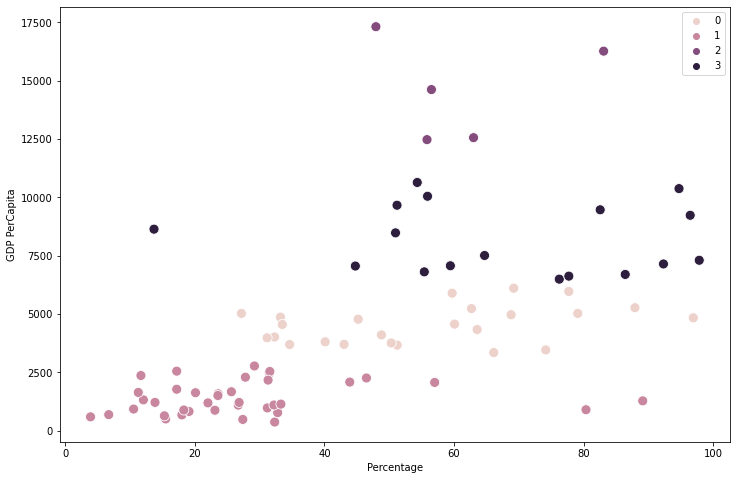

In [42]:
# Plot the clusters for the "Percentage" and "GDP_PerCapita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_upsec_comp_M['Percentage'], y=df_upsec_comp_M['GDP_PerCapita'], hue=kmeans_upsec_M.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('GDP PerCapita') # Label y-axis.
plt.show()

For Male Upper Secondary level completion, we can see that the high GDP clusters only have mid-high percentage completion at upper secondary level. 

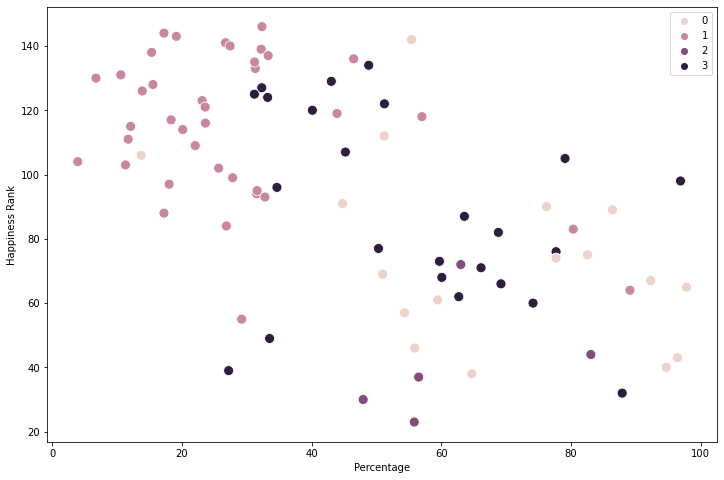

In [43]:
# Plot the clusters for the "Percentage" and "Happiness_Rank" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_upsec_comp_M['Percentage'], y=df_upsec_comp_M['Happiness_Rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('Happiness Rank') # Label y-axis.
plt.show()

In [44]:
# Renaming the clusters
df_upsec_comp_M.loc[df_upsec_comp_M['clusters'] == 1, 'Cluster'] = 'Low GDP PerCapita'
df_upsec_comp_M.loc[df_upsec_comp_M['clusters'] == 3, 'Cluster'] = 'Mid-High GDP PerCapita'
df_upsec_comp_M.loc[df_upsec_comp_M['clusters'] == 2, 'Cluster'] = 'High GDP PerCapita'
df_upsec_comp_M.loc[df_upsec_comp_M['clusters'] == 0, 'Cluster'] = 'Mid-Low GDP PerCapita'

In [68]:
# Export data
df_upsec_comp_M.to_csv(os.path.join(path,'02 Data','Prepared Data', 'clust_upsec_comp_M.csv'))

In [46]:
df_upsec_comp_M.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

GDP_PerCapita               Happiness_Rank         \
                                mean        median           mean median   
Cluster                                                                    
High GDP PerCapita      14644.933132  14617.604480      41.200000   37.0   
Low GDP PerCapita        1393.189106   1209.072738     115.026316  117.5   
Mid-High GDP PerCapita   8189.003530   7507.160971      74.411765   69.0   
Mid-Low GDP PerCapita    4538.384346   4558.662407      88.708333   84.5   

                       Percentage             
                             mean     median  
Cluster                                       
High GDP PerCapita      61.263963  56.500000  
Low GDP PerCapita       27.355164  24.619035  
Mid-High GDP PerCapita  67.909076  64.699997  
Mid-Low GDP PerCapita   55.683963  55.457520

For males at upper secondary level, a median percentage of completion of more than 55% is required to at least have mid to high GDPs. Low GDP countries have only 25% males completing their education. As with the observation at primary level, higher gdp corresponds to top rank in happiness.

In [73]:
df_upsec_comp_M_stats = df_upsec_comp_M.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

In [74]:
# Export data
df_upsec_comp_M_stats.to_csv(os.path.join(path,'02 Data','Prepared Data', 'stats_upsec_comp_M.csv'))

### Run k-means for female primary and uppersecondary completion

#### k-means for female primary completion

In [47]:
df_prim_comp_F.head()

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614
14,Albania,Completion rate for children of primary school...,Female,95.698372,90.0,6492.872012
26,Argentina,Completion rate for children of primary school...,Female,98.040077,57.0,10636.120200
36,Armenia,Completion rate for children of primary school...,Female,99.112640,82.0,4966.513471
60,Benin,Completion rate for children of primary school...,Female,44.196468,115.0,1319.154995


In [48]:
# Drop further categorical values
df_prim_comp_F = df_prim_comp_F[['Percentage', 'Happiness_Rank', 'GDP_PerCapita']]

In [49]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [50]:
# Fit the k-means object to the data.
kmeans.fit(df_prim_comp_F)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [51]:
# Creating new column to identify cluster num
df_prim_comp_F['Clusters'] = kmeans.fit_predict(df_prim_comp_F)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
df_prim_comp_F['Clusters'].value_counts()

0    38
3    24
1    17
2     5
Name: Clusters, dtype: int64

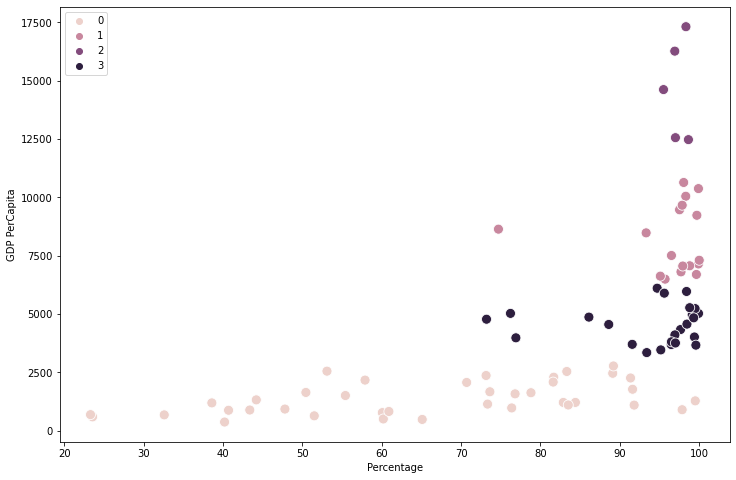

In [53]:
# Plot the clusters for the "Percentage" and "GDP_PerCapita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prim_comp_F['Percentage'], y=df_prim_comp_F['GDP_PerCapita'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('GDP PerCapita') # Label y-axis.
plt.show()

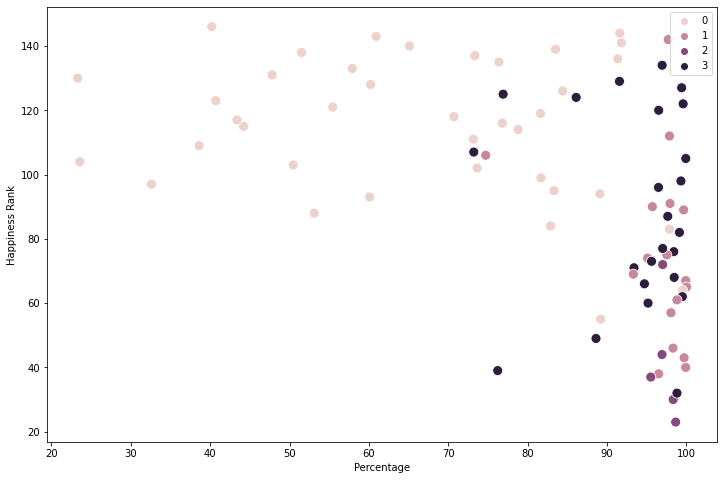

In [54]:
# Plot the clusters for the "Percentage" and "Happiness_Rank" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_prim_comp_F['Percentage'], y=df_prim_comp_F['Happiness_Rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('Happiness Rank') # Label y-axis.
plt.show()

In [55]:
# Renaming the clusters
df_prim_comp_F.loc[df_prim_comp_F['Clusters'] == 0, 'Cluster'] = 'Low GDP PerCapita'
df_prim_comp_F.loc[df_prim_comp_F['Clusters'] == 1, 'Cluster'] = 'Mid-High GDP PerCapita'
df_prim_comp_F.loc[df_prim_comp_F['Clusters'] == 2, 'Cluster'] = 'High GDP PerCapita'
df_prim_comp_F.loc[df_prim_comp_F['Clusters'] == 3, 'Cluster'] = 'Mid-Low GDP PerCapita'

In [56]:
# Export data
df_prim_comp_F.to_csv(os.path.join(path,'02 Data','Prepared Data', 'clust_prim_comp_F.csv'))

In [57]:
df_prim_comp_F.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

GDP_PerCapita               Happiness_Rank         \
                                mean        median           mean median   
Cluster                                                                    
High GDP PerCapita      14644.933132  14617.604480      41.200000   37.0   
Low GDP PerCapita        1393.189106   1209.072738     115.026316  117.5   
Mid-High GDP PerCapita   8189.003530   7507.160971      74.411765   69.0   
Mid-Low GDP PerCapita    4538.384346   4558.662407      88.708333   84.5   

                       Percentage             
                             mean     median  
Cluster                                       
High GDP PerCapita      97.275691  97.000000  
Low GDP PerCapita       66.302574  71.922642  
Mid-High GDP PerCapita  96.505089  97.922318  
Mid-Low GDP PerCapita   93.682671  96.716186

For females at primary level, a median of 71% completion rate at primary level puts the country in low GDP (compared to males at 68%). As with the male findings, high Percentage Completion at primary level could land the country in mid to high GDP per capita range.

#### k-means for female uppersecondary completion

In [58]:
df_upsec_comp_F.head()

,Percentage,Happiness_Rank,GDP_PerCapita
2,14.365360,146.0,368.754614
16,79.857063,90.0,6492.872012
28,65.963852,57.0,10636.120200
38,79.394547,82.0,4966.513471
62,5.440437,115.0,1319.154995


In [59]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4) 

In [60]:
# Fit the k-means object to the data.
kmeans.fit(df_upsec_comp_F)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [61]:
# Creating new column to identify cluster num
df_upsec_comp_F['Clusters'] = kmeans.fit_predict(df_upsec_comp_F)

C:\Users\Azalia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
df_upsec_comp_F['Clusters'].value_counts()

2    38
1    24
3    17
0     5
Name: Clusters, dtype: int64

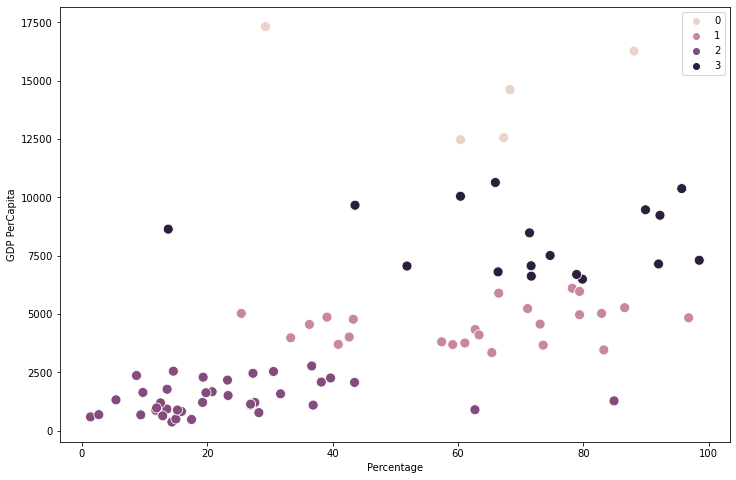

In [63]:
# Plot the clusters for the "Percentage" and "GDP_PerCapita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_upsec_comp_F['Percentage'], y=df_upsec_comp_F['GDP_PerCapita'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('GDP PerCapita') # Label y-axis.
plt.show()

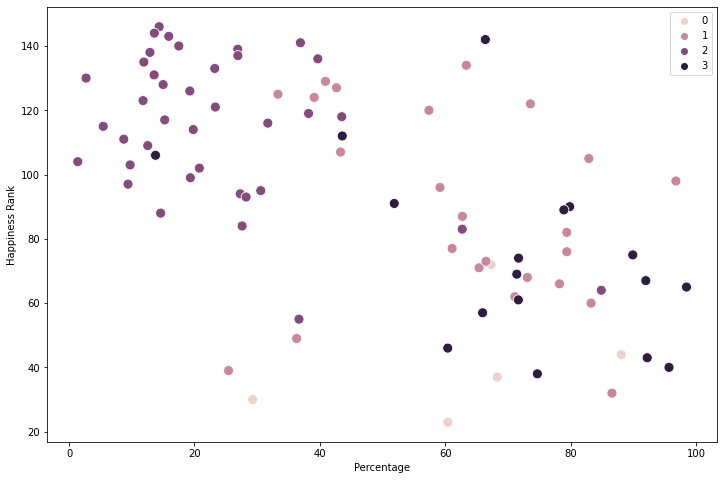

In [64]:
# Plot the clusters for the "Percentage" and "Happiness_Rank" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_upsec_comp_F['Percentage'], y=df_upsec_comp_F['Happiness_Rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percentage') # Label x-axis.
plt.ylabel('Happiness Rank') # Label y-axis.
plt.show()

In [65]:
# Renaming the clusters
df_upsec_comp_F.loc[df_upsec_comp_F['Clusters'] == 2, 'Cluster'] = 'Low GDP PerCapita'
df_upsec_comp_F.loc[df_upsec_comp_F['Clusters'] == 3, 'Cluster'] = 'Mid-High GDP PerCapita'
df_upsec_comp_F.loc[df_upsec_comp_F['Clusters'] == 0, 'Cluster'] = 'High GDP PerCapita'
df_upsec_comp_F.loc[df_upsec_comp_F['Clusters'] == 1, 'Cluster'] = 'Mid-Low GDP PerCapita'

In [66]:
# Export data
df_upsec_comp_F.to_csv(os.path.join(path,'02 Data','Prepared Data', 'clust_upsec_comp_F.csv'))

In [67]:
df_upsec_comp_F.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

GDP_PerCapita               Happiness_Rank         \
                                mean        median           mean median   
Cluster                                                                    
High GDP PerCapita      14644.933132  14617.604480      41.200000   37.0   
Low GDP PerCapita        1393.189106   1209.072738     115.026316  117.5   
Mid-High GDP PerCapita   8189.003530   7507.160971      74.411765   69.0   
Mid-Low GDP PerCapita    4538.384346   4558.662407      88.708333   84.5   

                       Percentage             
                             mean     median  
Cluster                                       
High GDP PerCapita      62.677241  67.300003  
Low GDP PerCapita       22.996935  19.302684  
Mid-High GDP PerCapita  71.682070  71.699997  
Mid-Low GDP PerCapita   62.546030  64.386515

For females at upper secondary level, a median percentage of completion of more than 64% is required to at least have mid to high GDPs (compared to male at 55%). Low GDP countries have only 19% females completing their education.

In [69]:
df_upsec_comp_F_stats = df_upsec_comp_F.groupby('Cluster').agg({'GDP_PerCapita':['mean', 'median'], 
                         'Happiness_Rank':['mean', 'median'], 
                         'Percentage':['mean', 'median']})

In [71]:
df_upsec_comp_F_stats.head()

GDP_PerCapita               Happiness_Rank         \
                                mean        median           mean median   
Cluster                                                                    
High GDP PerCapita      14644.933132  14617.604480      41.200000   37.0   
Low GDP PerCapita        1393.189106   1209.072738     115.026316  117.5   
Mid-High GDP PerCapita   8189.003530   7507.160971      74.411765   69.0   
Mid-Low GDP PerCapita    4538.384346   4558.662407      88.708333   84.5   

                       Percentage             
                             mean     median  
Cluster                                       
High GDP PerCapita      62.677241  67.300003  
Low GDP PerCapita       22.996935  19.302684  
Mid-High GDP PerCapita  71.682070  71.699997  
Mid-Low GDP PerCapita   62.546030  64.386515

In [72]:
# Export data
df_upsec_comp_F_stats.to_csv(os.path.join(path,'02 Data','Prepared Data', 'stats_upsec_comp_F.csv'))

# 5. Discussion

In summary,

1. For males, a median completion rate at primary level of at least 68% is required to possibly lift the country out of the low GDP per Capita cluster. For females at primary level, a median of more than 71% completion rate is required to put the country out of the low GDP PerCapita cluster.
2. At Uppersecondary level, for males, having more than 55% completion rate will place the country in mid to high GDP per capita. For female, more than 64% completion rate is required at this level to place the country in mid to high GDP.
Based on this, the data is possibly suggesting the importance of ensuring children are enabled to complete their education, as it has a possible correlation to the GDP as well as the country's happiness rank. More importantly, data shows that countries in mid to high GDP countries have higher percentage of women completing their studies at 64% compared to the male median at 55%. This shows the importance gender equity to enable females completing their education for the benefit of the country. Pushing the female uppersecondary completion rate in the low GDP countries to more than just 19% might just tilt the country's GDP. This may be the next steps we might want to explore.